# Linearisation Workflow

In [1]:
import mammos_analysis
import mammos_mumag
import pandas as pd

Assuming we already have the result of a hysteresis loop in the file `box.dat`, we can load it with

In [2]:
loop_results = mammos_mumag.hysteresis.Result(
    pd.read_csv(
        "box.dat",
        delimiter=" ",
        names=["configuration_type", "mu0_Hext", "polarisation", "E"],
    )
)

From this object we can extract `H`, `M`, and `EnergyDensity`. These represents, respectively, the external applied field, the spontaneous magnetisation, and the energy density.

In [3]:
loop_results.H

ExternalMagneticField(value=[ 397887.35751314  397728.20257013  397569.04762713 ... -168226.77475654
 -168385.92969955 -168545.08464255], unit=A / m)

In [4]:
loop_results.M

SpontaneousMagnetization(value=[ 0.97354961  0.983241    0.97846434 ... -0.77453543 -0.7870981
 -0.80654438], unit=T)

In [5]:
loop_results.EnergyDensity

EnergyDensity(value=[-0.32673491 -0.3278284  -0.32865243 ... -0.04862285 -0.05375878
 -0.05665882], unit=J / m3)

We can plot the hysteresis loop with the `plot` method:

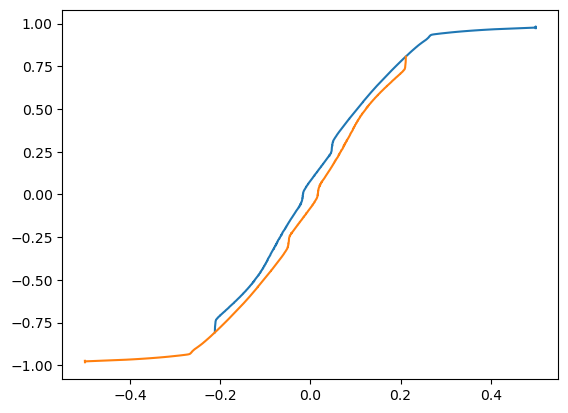

In [6]:
loop_results.plot(configuration_marks=False)

We can extract the extrinsic properties with the `extrinsic_properties` function from the `mammos_analysis` package:

In [7]:
extrinsic_properties = mammos_analysis.hysteresis.extrinsic_properties(
    loop_results.M, loop_results.H
)
extrinsic_properties

ExtrinsicProperties(Hc=CoercivityHcExternal(value=-63147.24333538003, unit=A / m), Mr=Remanence(value=-13209.860269418283, unit=A / m), BHmax=MaximumEnergyProduct(value=0.0, unit=J / m3))

And finally we can evaluate the length of the linearised segment using the `linearised_segment` function:

In [8]:
mammos_analysis.hysteresis.linearised_segment(loop_results.M, loop_results.H)

<Quantity 0.96131837 A / m>